In [35]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [36]:
df_country = df.copy()

In [37]:
#df_country.reset_index()
#df_country.rename(columns={'index': 'job_id'}, inplace=True)
#df_country = df_country.groupby('job_country').size()
    

In [60]:
df_median_country = df_country.groupby('job_country').agg(
    country_count=('job_country', 'count'),
    median_salary=('salary_year_avg', 'median')
).dropna().reset_index()


In [66]:
df_highest_job_counts = df_median_country.sort_values(by='country_count', ascending=False).head(7)

df_highest_job_counts

,job_country,country_count,median_salary
102,United States,206292,119187.5
40,India,51088,111175.0
101,United Kingdom,40375,104668.0
32,France,39922,97444.0
33,Germany,27694,111175.0
88,Spain,25100,98391.5
83,Singapore,23696,100500.0


In [67]:
highest_median_counts = df_median_country.sort_values(by='median_salary', ascending=False).head(7)
highest_median_counts

,job_country,country_count,median_salary
9,Belarus,543,400000.0
80,Russia,3743,300000.0
7,Bahamas,69,208114.0
27,Dominican Republic,478,157500.0
69,Northern Mariana Islands,4,155485.5
25,Côte d'Ivoire,53,147500.0
95,Tunisia,705,147500.0


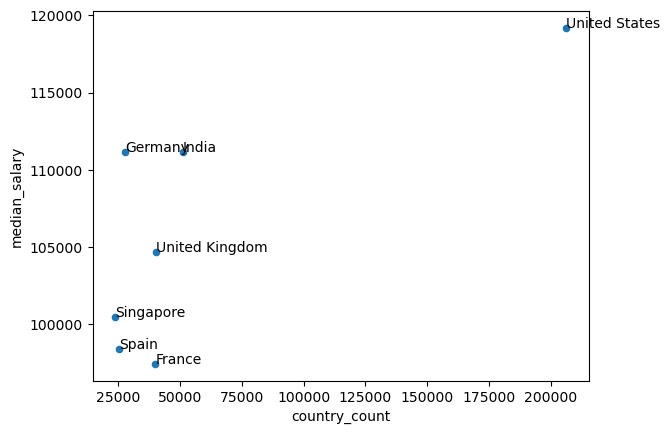

In [68]:
df_highest_job_counts.plot(kind='scatter', x = 'country_count', y = 'median_salary')
for i, txt in enumerate (df_highest_job_counts.job_country):
    plt.text(df_highest_job_counts['country_count'].iloc[i], df_highest_job_counts['median_salary'].iloc[i], txt)